Convergence reached after 2 iterations for k=2.


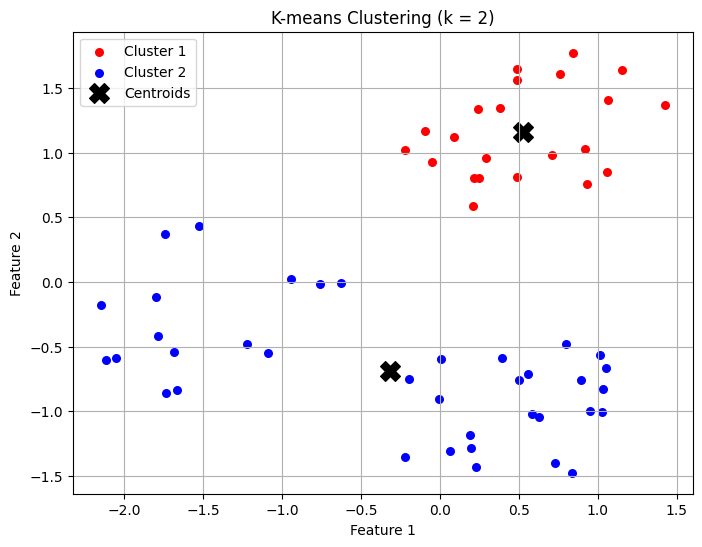

Convergence reached after 4 iterations for k=3.


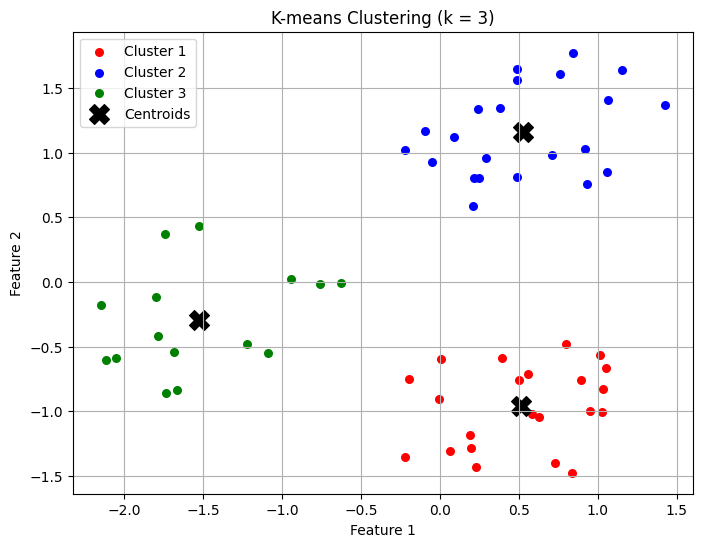

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def normalize_features(X):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    return (X - X.mean()) / X.std()

def initialize_centroids(X, k):
    indices = np.random.choice(range(X.shape[0]), k, replace=False)
    return X[indices]

def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    
    for iteration in range(max_iters):
        clusters = np.array([np.argmin(np.linalg.norm(x - centroids, axis=1)) for x in X])
        
        new_centroids = np.copy(centroids)
        for i in range(k):
            if np.any(clusters == i):
                new_centroids[i] = X[clusters == i].mean(axis=0)
        
        centroid_shifts = np.linalg.norm(new_centroids - centroids, axis=1)
        if np.all(centroid_shifts < tol):
            print(f'Convergence reached after {iteration+1} iterations for k={k}.')
            break
        
        centroids = new_centroids
    
    return clusters, centroids

def plot_clusters(X, clusters, centroids, k):
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow']
    for i in range(k):
        points = X[clusters == i]
        plt.scatter(points[:, 0], points[:, 1], s=30, color=colors[i % len(colors)], label=f'Cluster {i+1}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1],s=200, color='black', marker='X', label='Centroids')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clustering (k = {k})')
    plt.legend()
    plt.grid(True)
    plt.show()


df = pd.read_csv('kmean.csv')
X = df.values.astype(float)
X_normalized = normalize_features(X)
X_normalized = X_normalized.values

clusters_2, centroids_2 = k_means(X_normalized, k=2)
plt.figure(figsize=(8, 6))
plot_clusters(X_normalized, clusters_2, centroids_2, k=2)

clusters_3, centroids_3 = k_means(X_normalized, k=3)
plt.figure(figsize=(8, 6))
plot_clusters(X_normalized, clusters_3, centroids_3, k=3)